# Introduction

In this project, we will analyze the "Body Signal of Smoking" dataset from Kaggle, focusing on classifying smoking status based on physiological signals. We will compare the performance of two popular machine learning algorithms: 


  **- K-Nearest Neighbors (KNN).**
  
  **- Logistic Regression**

By evaluating their accuracy, precision, and recall, we aim to determine which algorithm is more effective for this classification task, ultimately contributing to enhanced methods for smoking detection and health monitoring.

# Starting with KNN

To begin our analysis, we will first implement the K-Nearest Neighbors algorithm. KNN is a simple yet powerful classification method that predicts the class of a sample based on the classes of its nearest neighbors in the feature space. We will preprocess the data and evaluate the model's performance using relevant metrics.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [50]:
# Load the dataset, treating the first row as the header
DataSmoking = pd.read_csv(r"C:\Users\norah\Desktop\Najm AI\Classofocation Project\archive (2)\smoking.csv", header=0, na_values=' ?')

# Display the first few rows
print(DataSmoking.head())

   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y           

We selected 5,500 samples because KNN works well with smaller datasets. While it can handle larger datasets, the computation time increases significantly.

In [51]:
total_samples = DataSmoking.shape[0]
print(f"Total samples in the dataset: {total_samples}")

# Sample 5500 rows from the dataset
sampled_data = DataSmoking.sample(n=5500, random_state=42)

# Display the first few rows of the sampled data
print(sampled_data.head())

# Save the sampled data to a new CSV file
sampled_data.to_csv(r"C:\Users\norah\Desktop\Najm AI\Classofocation Project\archive (2)\smoking_samples.csv", index=False)

Total samples in the dataset: 55692
          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
33967  42427      F   45         160          55       71.0             1.0   
21956  27412      F   55         145          40       80.4             0.8   
15458  19283      M   25         170          80       94.0             1.0   
36215  45261      M   45         170          70       82.0             0.5   
8886   11155      M   40         165          60       77.0             1.2   

       eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
33967              0.5            1.0             1.0  ...        11.3   
21956              0.5            1.0             1.0  ...        14.0   
15458              1.2            1.0             1.0  ...        16.6   
36215              0.4            1.0             1.0  ...        14.9   
8886               1.2            1.0             1.0  ...        16.4   

       Urine protein  serum creatinine   AST

**Read** the samples file

In [52]:
DataSmokingSamples = pd.read_csv(r"C:\Users\norah\Desktop\Najm AI\Classofocation Project\archive (2)\smoking_samples.csv", header=0, na_values=' ?')

## Check if there are Nans

In [53]:
# Check for NaN values in each column
nan_counts = DataSmokingSamples.isnull().sum()

# Print the count of NaN values for each column
print("Count of NaN values in each column:")
print(nan_counts)

Count of NaN values in each column:
ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64


In [54]:
DataSmokingSamples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5500 non-null   int64  
 1   gender               5500 non-null   object 
 2   age                  5500 non-null   int64  
 3   height(cm)           5500 non-null   int64  
 4   weight(kg)           5500 non-null   int64  
 5   waist(cm)            5500 non-null   float64
 6   eyesight(left)       5500 non-null   float64
 7   eyesight(right)      5500 non-null   float64
 8   hearing(left)        5500 non-null   float64
 9   hearing(right)       5500 non-null   float64
 10  systolic             5500 non-null   float64
 11  relaxation           5500 non-null   float64
 12  fasting blood sugar  5500 non-null   float64
 13  Cholesterol          5500 non-null   float64
 14  triglyceride         5500 non-null   float64
 15  HDL                  5500 non-null   f

We need to drop any **ID** columns

In [55]:
# Drop unnecessary features
DataSmokingSamples = DataSmokingSamples.drop(columns=['ID'])

We noted that the **"oral"** feature contains only the result **"Y"**. Therefore, we had to check every unique result of the **"oral"** feature to confirm its variability. 

In [56]:
unique_orders = DataSmokingSamples['oral'].unique()
print(unique_orders[:200])

['Y']


We observed that the **"oral"** feature contains only the value **"Y"**. Since this feature does not provide any variability or useful information for our model, we decided to drop it from the dataset.

In [57]:
DataSmokingSamples = DataSmokingSamples.drop(columns=['oral'])

## Convert the object data into Dummy data

In [58]:
categorical_cols = ['gender', 'tartar']
# Convert categorical variables to dummy variables
data_with_dummies = pd.get_dummies(DataSmokingSamples, columns=categorical_cols, drop_first=True)

# Check the new DataFrame with dummy variables
print(data_with_dummies.head())

   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   45         160          55       71.0             1.0              0.5   
1   55         145          40       80.4             0.8              0.5   
2   25         170          80       94.0             1.0              1.2   
3   45         170          70       82.0             0.5              0.4   
4   40         165          60       77.0             1.2              1.2   

   hearing(left)  hearing(right)  systolic  relaxation  ...  hemoglobin  \
0            1.0             1.0     111.0        56.0  ...        11.3   
1            1.0             1.0     104.0        70.0  ...        14.0   
2            1.0             1.0     110.0        70.0  ...        16.6   
3            1.0             1.0     124.0        82.0  ...        14.9   
4            1.0             1.0     123.0        73.0  ...        16.4   

   Urine protein  serum creatinine   AST    ALT    Gtp  dental caries  \
0      

We will begin by preparing the dataset, where **X** represents the features and **y** is the target variable. We will evaluate the performance of the K-Nearest Neighbors (KNN) algorithm by testing values for k ranging from 1 to 100 and selecting between the weight options of **'uniform'** and **'distance'**.

In [59]:
# Define features and target variable
X = data_with_dummies.drop(columns=['smoking'])   # Features
y = data_with_dummies['smoking']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for k values and weight options
k_range = range(1, 101)  # k values from 1 to 100
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'weights': weight_options}

# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best k and corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_weight = grid_search.best_params_['weights']
best_accuracy = grid_search.best_score_

# Make predictions with the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the model
print(f'Best k: {best_k}, Best Weight: {best_weight}, Best Cross-Validation Accuracy: {best_accuracy:.4f}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best k: 89, Best Weight: distance, Best Cross-Validation Accuracy: 0.7364
[[510 175]
 [139 276]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       685
           1       0.61      0.67      0.64       415

    accuracy                           0.71      1100
   macro avg       0.70      0.70      0.70      1100
weighted avg       0.72      0.71      0.72      1100



The results from our K-Nearest Neighbors (KNN) classification indicate that the best settings for our model are **89 neighbors** (k) and a **'distance'** weighting method. This combination achieved a cross-validation accuracy of **73.64%**.

Looking at the confusion matrix, we see that the model **correctly** identified **510 non-smokers (class 0) and 276 smokers (class 1)**. However, it also misclassified **175 non-smokers and 139 smokers**.

In terms of performance:

The precision for non-smokers (class 0) is **0.79**, meaning **79%** of the time when the model predicts someone is a non-smoker, it is correct.
For smokers (class 1), the precision is **0.61**, indicating that **61%** of the predictions are accurate.
The recall, which measures how well the model identifies actual cases, is **0.74** for non-smokers and **0.67** for smokers. This means the model successfully identified **74%** of non-smokers and **67%** of smokers in the dataset.

Overall, the model's accuracy is **71%**, and the averages for precision, recall, and F1-score show a balanced performance for both classes. This means that while the model is better at identifying non-smokers, it still performs reasonably well for smokers.

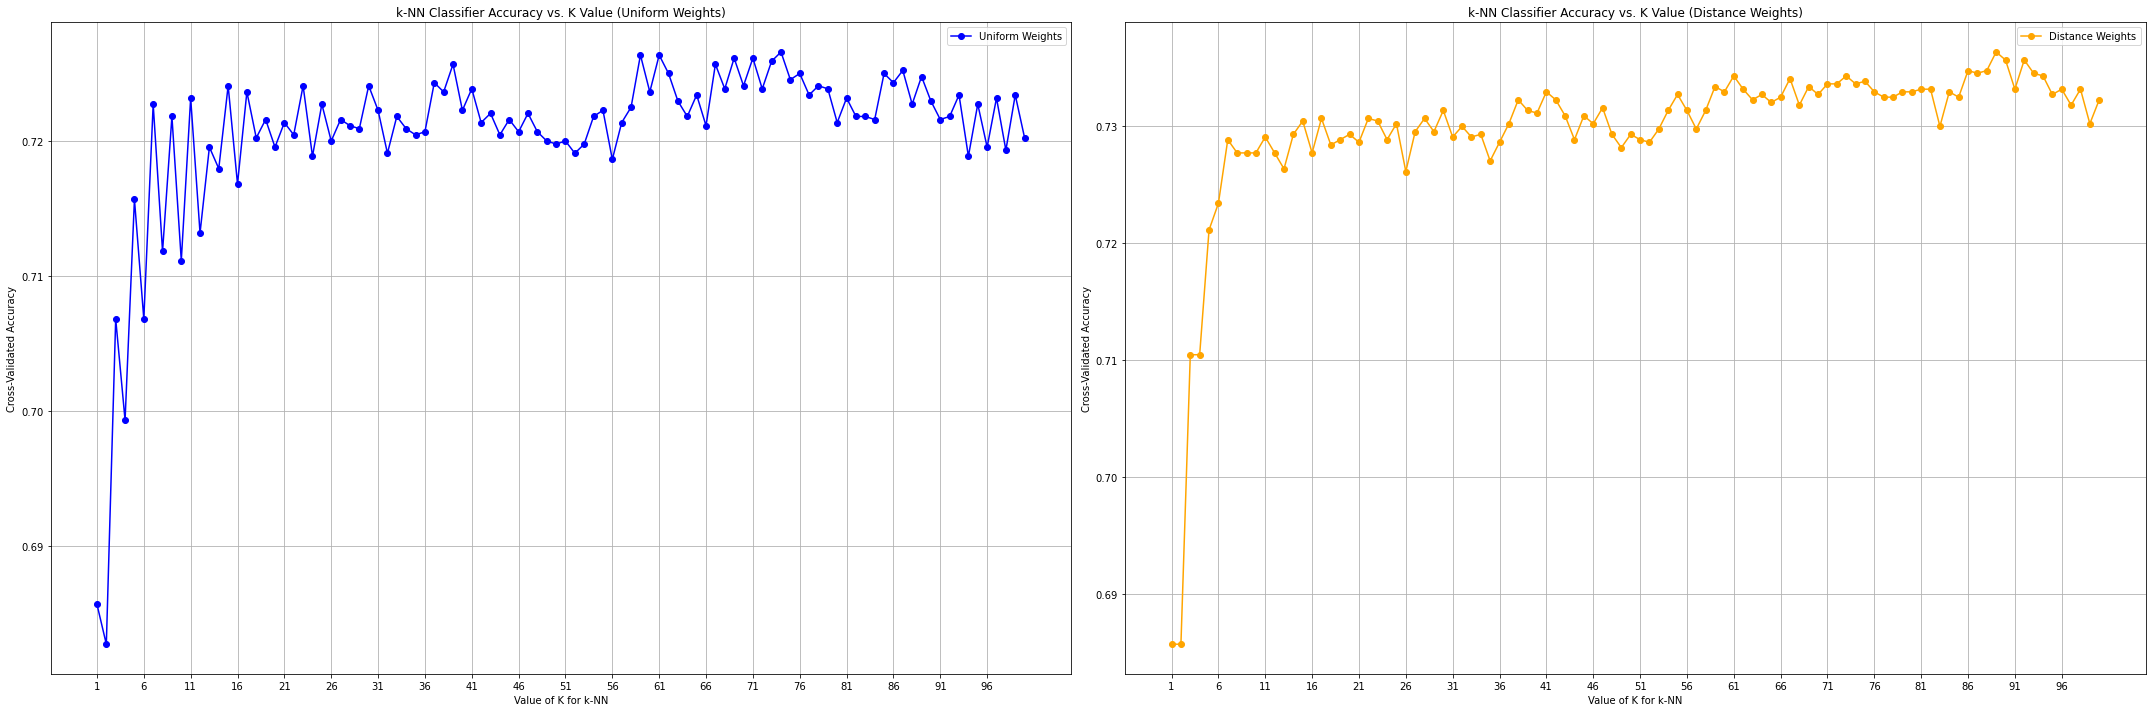

In [60]:
# Get the results from GridSearchCV
results = grid_search.cv_results_

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Extract k values and mean test scores
k_range = results_df['param_n_neighbors'].astype(int)
k_scores = results_df['mean_test_score']

# Reshape k_scores to separate uniform and distance scores
k_scores_uniform = k_scores[results_df['param_weights'] == 'uniform']
k_scores_distance = k_scores[results_df['param_weights'] == 'distance']

# Plotting the results
plt.figure(figsize=(30, 10))

# Plot for 'uniform' weights
plt.subplot(1, 2, 1)
plt.plot(k_range[results_df['param_weights'] == 'uniform'], k_scores_uniform, 
         marker='o', color='blue', label='Uniform Weights')
plt.title('k-NN Classifier Accuracy vs. K Value (Uniform Weights)')
plt.xlabel('Value of K for k-NN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.xticks(np.arange(1, 101, 5))
plt.legend()

# Plot for 'distance' weights
plt.subplot(1, 2, 2)
plt.plot(k_range[results_df['param_weights'] == 'distance'], k_scores_distance, 
         marker='o', color='orange', label='Distance Weights')
plt.title('k-NN Classifier Accuracy vs. K Value (Distance Weights)')
plt.xlabel('Value of K for k-NN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.xticks(np.arange(1, 101, 5))
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

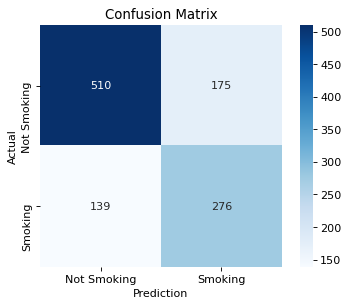

In [61]:
def make_confusion_matrix(model, X_test, y_test, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (best_knn.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)

    # Plotting the confusion matrix
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                 xticklabels=['Not Smoking', 'Smoking'],  # Adjust labels based on your target
                 yticklabels=['Not Smoking', 'Smoking'])  # Adjust labels based on your target
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function to display the confusion matrix
make_confusion_matrix(best_knn, X_test, y_test)